In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [11]:
df = pd.read_csv(r"C:\Users\theba\OneDrive\Desktop\NC STATE\SPRING 2023 SEM 2\CSC 522 - ALDA\Project\Dataset\GPT-wiki-intro.csv")

In [12]:
df

,id,url,title,wiki_intro,generated_intro,title_len,wiki_intro_len,generated_intro_len,prompt,generated_text,prompt_tokens,generated_text_tokens
0,63064638,https://en.wikipedia.org/wiki/Sexhow%20railway...,Sexhow railway station,Sexhow railway station was a railway station b...,Sexhow railway station was a railway station l...,3,174,78,200 word wikipedia style introduction on 'Sexh...,"located in the town of Sexhow, on the Cumbria...",25,88
1,279621,https://en.wikipedia.org/wiki/Eti%C3%A4inen,Etiäinen,"In Finnish folklore, all places and things, an...","In Finnish folklore, all places and things, an...",1,187,80,200 word wikipedia style introduction on 'Etiä...,"animate or inanimate, have a spirit or ""etiäi...",26,101
2,287229,https://en.wikipedia.org/wiki/Inverse%20functi...,Inverse function theorem,"In mathematics, specifically differential calc...","In mathematics, specifically differential calc...",3,170,59,200 word wikipedia style introduction on 'Inve...,function theorem states that for every real-v...,26,65
3,26712375,https://en.wikipedia.org/wiki/Stepping%20on%20...,Stepping on Roses,is a Japanese shōjo manga series written and i...,is a Japanese shōjo manga series written and i...,3,335,121,200 word wikipedia style introduction on 'Step...,and illustrated by Maki Fujii. The series fol...,26,150
4,38894426,https://en.wikipedia.org/wiki/Rob%20Bradley,Rob Bradley,"Robert Milner ""Rob"" Bradley, Jr. (born August ...","Robert Milner ""Rob"" Bradley, Jr. (born August ...",2,170,136,200 word wikipedia style introduction on 'Rob ...,"29, 1973) is an American former professional ...",28,162
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,44173767,https://en.wikipedia.org/wiki/Randy%20Borum,Randy Borum,Randy Borum is a Professor and Coordinator of ...,Randy Borum is a Professor and Coordinator of ...,2,185,71,200 word wikipedia style introduction on 'Rand...,of the Master of Fine Arts Program in Creativ...,25,92
149996,33564134,https://en.wikipedia.org/wiki/Sa%27och%20language,Sa'och language,"Sa'och (, also, ""Sauch"") is an endangered, nea...","Sa'och (, also, ""Sauch"") is an endangered, nuc...",2,175,134,200 word wikipedia style introduction on 'Sa'o...,"nuclear-speaking, isolate language of the Ath...",33,184
149997,4219548,https://en.wikipedia.org/wiki/Philip%20Hanawalt,Philip Hanawalt,Philip C. Hanawalt (born 1931) is an American ...,Philip C. Hanawalt (born 1931) is an American ...,2,166,191,200 word wikipedia style introduction on 'Phil...,American graphic artist and illustrator. He i...,30,272
149998,2625970,https://en.wikipedia.org/wiki/Vossius%20Gymnasium,Vossius Gymnasium,Vossius Gymnasium is a public gymnasium in Ams...,Vossius Gymnasium is a public gymnasium in the...,2,168,108,200 word wikipedia style introduction on 'Voss...,"the town of Vossius, Netherlands. It is named...",32,147


In [13]:
#print list of stopwords

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
def count_stop_words(sentence):
    count = 0
    for word in sentence.split():
        if word in stopwords:
            count += 1
    return count

In [20]:
human_sentences = df['wiki_intro']
ai_sentences = df['generated_intro']
df['human_stop_word_count'] = human_sentences.apply(count_stop_words)
df['AI_stop_word_count'] = ai_sentences.apply(count_stop_words)

In [21]:
df

,id,url,title,wiki_intro,generated_intro,title_len,wiki_intro_len,generated_intro_len,prompt,generated_text,prompt_tokens,generated_text_tokens,human_stop_word_count,AI_stop_word_count
0,63064638,https://en.wikipedia.org/wiki/Sexhow%20railway...,Sexhow railway station,Sexhow railway station was a railway station b...,Sexhow railway station was a railway station l...,3,174,78,200 word wikipedia style introduction on 'Sexh...,"located in the town of Sexhow, on the Cumbria...",25,88,71,28
1,279621,https://en.wikipedia.org/wiki/Eti%C3%A4inen,Etiäinen,"In Finnish folklore, all places and things, an...","In Finnish folklore, all places and things, an...",1,187,80,200 word wikipedia style introduction on 'Etiä...,"animate or inanimate, have a spirit or ""etiäi...",26,101,72,33
2,287229,https://en.wikipedia.org/wiki/Inverse%20functi...,Inverse function theorem,"In mathematics, specifically differential calc...","In mathematics, specifically differential calc...",3,170,59,200 word wikipedia style introduction on 'Inve...,function theorem states that for every real-v...,26,65,76,20
3,26712375,https://en.wikipedia.org/wiki/Stepping%20on%20...,Stepping on Roses,is a Japanese shōjo manga series written and i...,is a Japanese shōjo manga series written and i...,3,335,121,200 word wikipedia style introduction on 'Step...,and illustrated by Maki Fujii. The series fol...,26,150,146,57
4,38894426,https://en.wikipedia.org/wiki/Rob%20Bradley,Rob Bradley,"Robert Milner ""Rob"" Bradley, Jr. (born August ...","Robert Milner ""Rob"" Bradley, Jr. (born August ...",2,170,136,200 word wikipedia style introduction on 'Rob ...,"29, 1973) is an American former professional ...",28,162,61,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,44173767,https://en.wikipedia.org/wiki/Randy%20Borum,Randy Borum,Randy Borum is a Professor and Coordinator of ...,Randy Borum is a Professor and Coordinator of ...,2,185,71,200 word wikipedia style introduction on 'Rand...,of the Master of Fine Arts Program in Creativ...,25,92,66,25
149996,33564134,https://en.wikipedia.org/wiki/Sa%27och%20language,Sa'och language,"Sa'och (, also, ""Sauch"") is an endangered, nea...","Sa'och (, also, ""Sauch"") is an endangered, nuc...",2,175,134,200 word wikipedia style introduction on 'Sa'o...,"nuclear-speaking, isolate language of the Ath...",33,184,62,60
149997,4219548,https://en.wikipedia.org/wiki/Philip%20Hanawalt,Philip Hanawalt,Philip C. Hanawalt (born 1931) is an American ...,Philip C. Hanawalt (born 1931) is an American ...,2,166,191,200 word wikipedia style introduction on 'Phil...,American graphic artist and illustrator. He i...,30,272,55,57
149998,2625970,https://en.wikipedia.org/wiki/Vossius%20Gymnasium,Vossius Gymnasium,Vossius Gymnasium is a public gymnasium in Ams...,Vossius Gymnasium is a public gymnasium in the...,2,168,108,200 word wikipedia style introduction on 'Voss...,"the town of Vossius, Netherlands. It is named...",32,147,66,40


In [36]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

def count_nouns(sentence):
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)
    count = len([word for word, pos in pos_tags if pos.startswith('N')])
    return count

In [37]:
df['human_noun_count'] = human_sentences.apply(count_nouns)
df['AI_noun_count'] = ai_sentences.apply(count_nouns)

In [38]:
df

,id,url,title,wiki_intro,generated_intro,title_len,wiki_intro_len,generated_intro_len,prompt,generated_text,prompt_tokens,generated_text_tokens,human_stop_word_count,AI_stop_word_count,human_noun_count,AI_noun_count
0,63064638,https://en.wikipedia.org/wiki/Sexhow%20railway...,Sexhow railway station,Sexhow railway station was a railway station b...,Sexhow railway station was a railway station l...,3,174,78,200 word wikipedia style introduction on 'Sexh...,"located in the town of Sexhow, on the Cumbria...",25,88,71,28,61,28
1,279621,https://en.wikipedia.org/wiki/Eti%C3%A4inen,Etiäinen,"In Finnish folklore, all places and things, an...","In Finnish folklore, all places and things, an...",1,187,80,200 word wikipedia style introduction on 'Etiä...,"animate or inanimate, have a spirit or ""etiäi...",26,101,72,33,56,24
2,287229,https://en.wikipedia.org/wiki/Inverse%20functi...,Inverse function theorem,"In mathematics, specifically differential calc...","In mathematics, specifically differential calc...",3,170,59,200 word wikipedia style introduction on 'Inve...,function theorem states that for every real-v...,26,65,76,20,46,15
3,26712375,https://en.wikipedia.org/wiki/Stepping%20on%20...,Stepping on Roses,is a Japanese shōjo manga series written and i...,is a Japanese shōjo manga series written and i...,3,335,121,200 word wikipedia style introduction on 'Step...,and illustrated by Maki Fujii. The series fol...,26,150,146,57,88,31
4,38894426,https://en.wikipedia.org/wiki/Rob%20Bradley,Rob Bradley,"Robert Milner ""Rob"" Bradley, Jr. (born August ...","Robert Milner ""Rob"" Bradley, Jr. (born August ...",2,170,136,200 word wikipedia style introduction on 'Rob ...,"29, 1973) is an American former professional ...",28,162,61,44,72,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,44173767,https://en.wikipedia.org/wiki/Randy%20Borum,Randy Borum,Randy Borum is a Professor and Coordinator of ...,Randy Borum is a Professor and Coordinator of ...,2,185,71,200 word wikipedia style introduction on 'Rand...,of the Master of Fine Arts Program in Creativ...,25,92,66,25,101,35
149996,33564134,https://en.wikipedia.org/wiki/Sa%27och%20language,Sa'och language,"Sa'och (, also, ""Sauch"") is an endangered, nea...","Sa'och (, also, ""Sauch"") is an endangered, nuc...",2,175,134,200 word wikipedia style introduction on 'Sa'o...,"nuclear-speaking, isolate language of the Ath...",33,184,62,60,70,41
149997,4219548,https://en.wikipedia.org/wiki/Philip%20Hanawalt,Philip Hanawalt,Philip C. Hanawalt (born 1931) is an American ...,Philip C. Hanawalt (born 1931) is an American ...,2,166,191,200 word wikipedia style introduction on 'Phil...,American graphic artist and illustrator. He i...,30,272,55,57,75,68
149998,2625970,https://en.wikipedia.org/wiki/Vossius%20Gymnasium,Vossius Gymnasium,Vossius Gymnasium is a public gymnasium in Ams...,Vossius Gymnasium is a public gymnasium in the...,2,168,108,200 word wikipedia style introduction on 'Voss...,"the town of Vossius, Netherlands. It is named...",32,147,66,40,66,41


In [39]:
def count_verbs(sentence):
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)
    count = len([word for word, pos in pos_tags if pos.startswith('V')])
    return count

In [40]:
def count_adjectives(sentence):
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)
    count = len([word for word, pos in pos_tags if pos.startswith('J')])
    return count

In [41]:
def count_adverbs(sentence):
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)
    count = len([word for word, pos in pos_tags if pos.startswith('R')])
    return count

In [42]:
def count_pronouns(sentence):
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)
    count = len([word for word, pos in pos_tags if pos.startswith('P')])
    return count

In [43]:
df['human_verb_count'] = human_sentences.apply(count_verbs)
df['AI_verb_count'] = ai_sentences.apply(count_verbs)

In [44]:
df['human_adjective_count'] = human_sentences.apply(count_adjectives)
df['AI_adjective_count'] = ai_sentences.apply(count_adjectives)

In [45]:
df['human_adverb_count'] = human_sentences.apply(count_adverbs)
df['AI_adverb_count'] = ai_sentences.apply(count_adverbs)

In [46]:
df['human_pronoun_count'] = human_sentences.apply(count_pronouns)
df['AI_pronoun_count'] = ai_sentences.apply(count_pronouns)

In [47]:
df

,id,url,title,wiki_intro,generated_intro,title_len,wiki_intro_len,generated_intro_len,prompt,generated_text,...,human_noun_count,AI_noun_count,human_verb_count,AI_verb_count,human_adjective_count,AI_adjective_count,human_adverb_count,AI_adverb_count,human_pronoun_count,AI_pronoun_count
0,63064638,https://en.wikipedia.org/wiki/Sexhow%20railway...,Sexhow railway station,Sexhow railway station was a railway station b...,Sexhow railway station was a railway station l...,3,174,78,200 word wikipedia style introduction on 'Sexh...,"located in the town of Sexhow, on the Cumbria...",...,61,28,30,10,2,5,9,2,4,1
1,279621,https://en.wikipedia.org/wiki/Eti%C3%A4inen,Etiäinen,"In Finnish folklore, all places and things, an...","In Finnish folklore, all places and things, an...",1,187,80,200 word wikipedia style introduction on 'Etiä...,"animate or inanimate, have a spirit or ""etiäi...",...,56,24,33,15,16,7,12,6,6,2
2,287229,https://en.wikipedia.org/wiki/Inverse%20functi...,Inverse function theorem,"In mathematics, specifically differential calc...","In mathematics, specifically differential calc...",3,170,59,200 word wikipedia style introduction on 'Inve...,function theorem states that for every real-v...,...,46,15,15,7,24,13,9,2,3,1
3,26712375,https://en.wikipedia.org/wiki/Stepping%20on%20...,Stepping on Roses,is a Japanese shōjo manga series written and i...,is a Japanese shōjo manga series written and i...,3,335,121,200 word wikipedia style introduction on 'Step...,and illustrated by Maki Fujii. The series fol...,...,88,31,67,26,17,9,16,8,36,15
4,38894426,https://en.wikipedia.org/wiki/Rob%20Bradley,Rob Bradley,"Robert Milner ""Rob"" Bradley, Jr. (born August ...","Robert Milner ""Rob"" Bradley, Jr. (born August ...",2,170,136,200 word wikipedia style introduction on 'Rob ...,"29, 1973) is an American former professional ...",...,72,64,19,14,5,5,3,1,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,44173767,https://en.wikipedia.org/wiki/Randy%20Borum,Randy Borum,Randy Borum is a Professor and Coordinator of ...,Randy Borum is a Professor and Coordinator of ...,2,185,71,200 word wikipedia style introduction on 'Rand...,of the Master of Fine Arts Program in Creativ...,...,101,35,16,7,1,3,2,1,6,4
149996,33564134,https://en.wikipedia.org/wiki/Sa%27och%20language,Sa'och language,"Sa'och (, also, ""Sauch"") is an endangered, nea...","Sa'och (, also, ""Sauch"") is an endangered, nuc...",2,175,134,200 word wikipedia style introduction on 'Sa'o...,"nuclear-speaking, isolate language of the Ath...",...,70,41,21,22,12,13,13,7,3,2
149997,4219548,https://en.wikipedia.org/wiki/Philip%20Hanawalt,Philip Hanawalt,Philip C. Hanawalt (born 1931) is an American ...,Philip C. Hanawalt (born 1931) is an American ...,2,166,191,200 word wikipedia style introduction on 'Phil...,American graphic artist and illustrator. He i...,...,75,68,19,26,7,25,3,4,10,15
149998,2625970,https://en.wikipedia.org/wiki/Vossius%20Gymnasium,Vossius Gymnasium,Vossius Gymnasium is a public gymnasium in Ams...,Vossius Gymnasium is a public gymnasium in the...,2,168,108,200 word wikipedia style introduction on 'Voss...,"the town of Vossius, Netherlands. It is named...",...,66,41,24,13,15,8,4,2,3,5


In [48]:
df.to_csv('final_dataset.csv', index=False)

In [49]:
import matplotlib.pyplot as plt

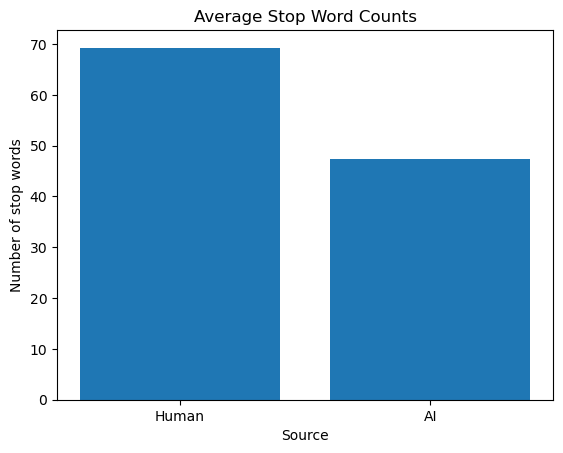

In [52]:
#Plot 1 - Average stop words
avg_human_stop_count = df['human_stop_word_count'].mean()
avg_ai_stop_count = df['AI_stop_word_count'].mean()

# Create a bar plot of the average word counts
plt.bar(['Human', 'AI'], [avg_human_stop_count, avg_ai_stop_count])
plt.title('Average Stop Word Counts')
plt.xlabel('Source')
plt.ylabel('Number of stop words')
plt.show()

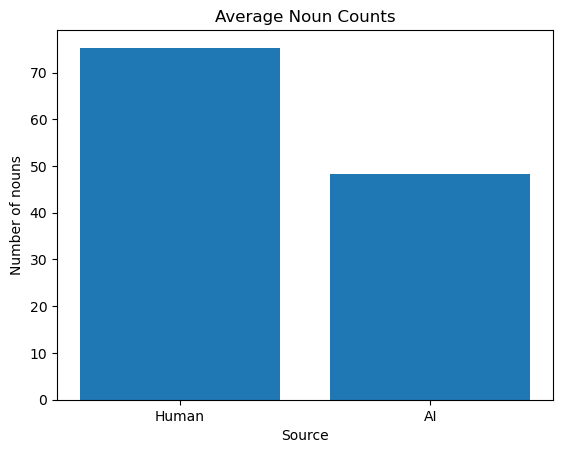

In [55]:
#Plot 2 - Average noun count
avg_human_noun_count = df['human_noun_count'].mean()
avg_ai_noun_count = df['AI_noun_count'].mean()

# Create a bar plot of the average word counts
plt.bar(['Human', 'AI'], [avg_human_noun_count, avg_ai_noun_count])
plt.title('Average Noun Counts')
plt.xlabel('Source')
plt.ylabel('Number of nouns')
plt.show()

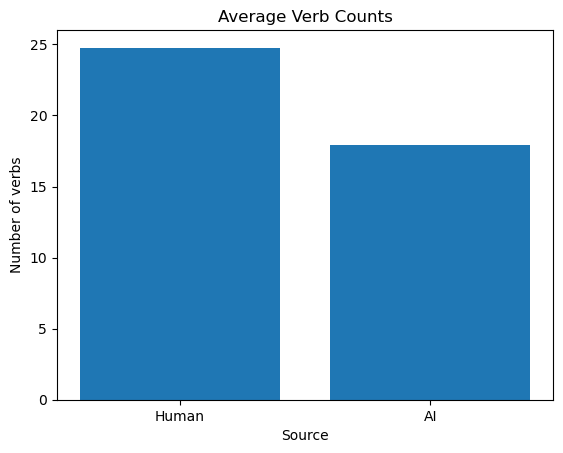

In [56]:
#Plot 3 - Average verb count
avg_human_verb_count = df['human_verb_count'].mean()
avg_ai_verb_count = df['AI_verb_count'].mean()

# Create a bar plot of the average word counts
plt.bar(['Human', 'AI'], [avg_human_verb_count, avg_ai_verb_count])
plt.title('Average Verb Counts')
plt.xlabel('Source')
plt.ylabel('Number of verbs')
plt.show()

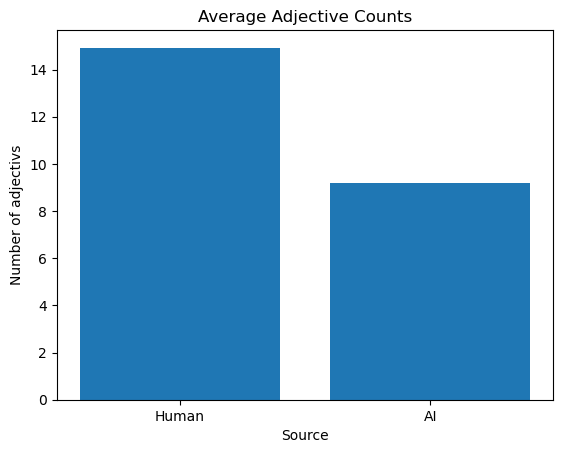

In [57]:
#Plot 4 - Average adjective count
avg_human_adjective_count = df['human_adjective_count'].mean()
avg_ai_adjective_count = df['AI_adjective_count'].mean()

# Create a bar plot of the average word counts
plt.bar(['Human', 'AI'], [avg_human_adjective_count, avg_ai_adjective_count])
plt.title('Average Adjective Counts')
plt.xlabel('Source')
plt.ylabel('Number of adjectivs')
plt.show()

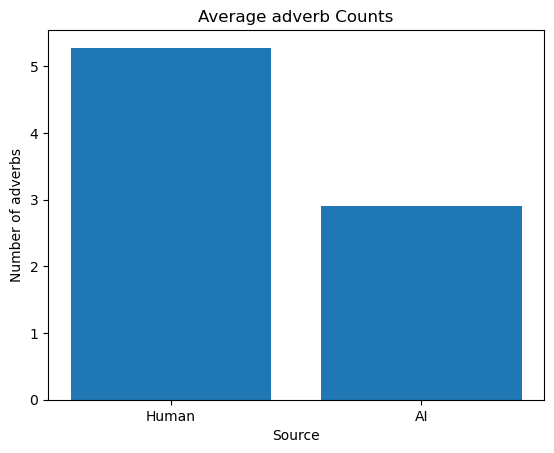

In [59]:
#Plot 5 - Average adverb count
avg_human_adverb_count = df['human_adverb_count'].mean()
avg_ai_adverb_count = df['AI_adverb_count'].mean()

# Create a bar plot of the average word counts
plt.bar(['Human', 'AI'], [avg_human_adverb_count, avg_ai_adverb_count])
plt.title('Average adverb Counts')
plt.xlabel('Source')
plt.ylabel('Number of adverbs')
plt.show()

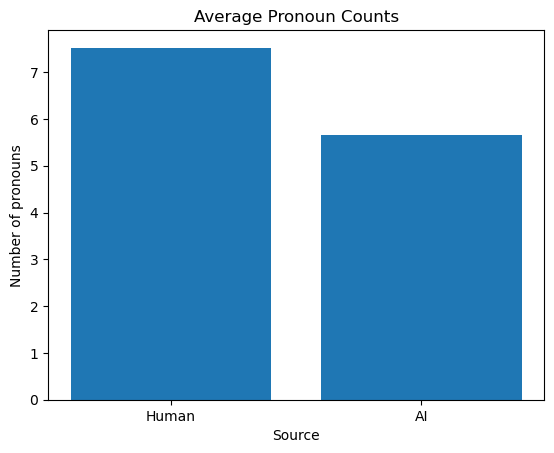

In [60]:
#Plot 6 - Average pronoun count
avg_human_pronoun_count = df['human_pronoun_count'].mean()
avg_ai_pronoun_count = df['AI_pronoun_count'].mean()

# Create a bar plot of the average word counts
plt.bar(['Human', 'AI'], [avg_human_pronoun_count, avg_ai_pronoun_count])
plt.title('Average Pronoun Counts')
plt.xlabel('Source')
plt.ylabel('Number of pronouns')
plt.show()

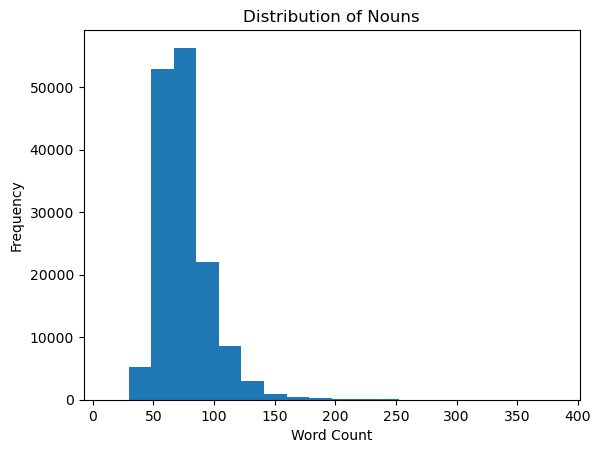

In [63]:
#Plot 7 - Distribution of human_nouns
plt.hist(df['human_noun_count'], bins=20)
plt.title('Distribution of Nouns')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

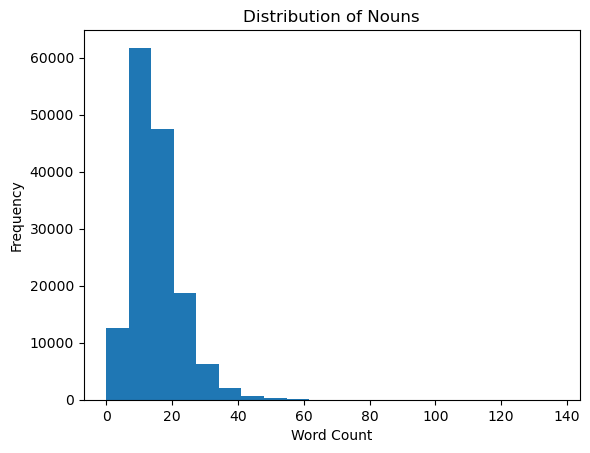

In [67]:
#Plot 8 - Distribution of human_adjectives
plt.hist(df['human_adjective_count'], bins=20)
plt.title('Distribution of Nouns')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

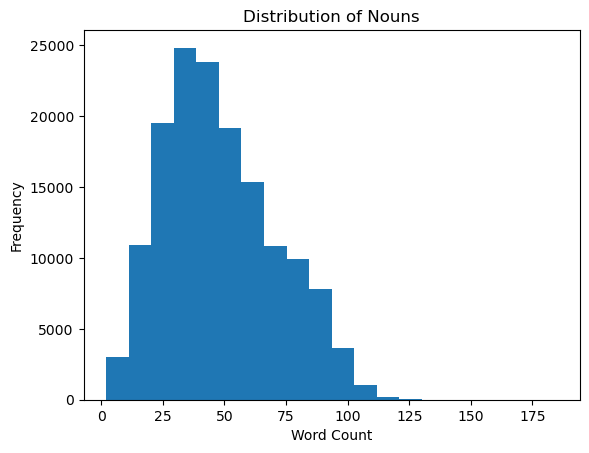

In [68]:
#Plot 9 - Distribution of AI_nouns
plt.hist(df['AI_noun_count'], bins=20)
plt.title('Distribution of Nouns')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

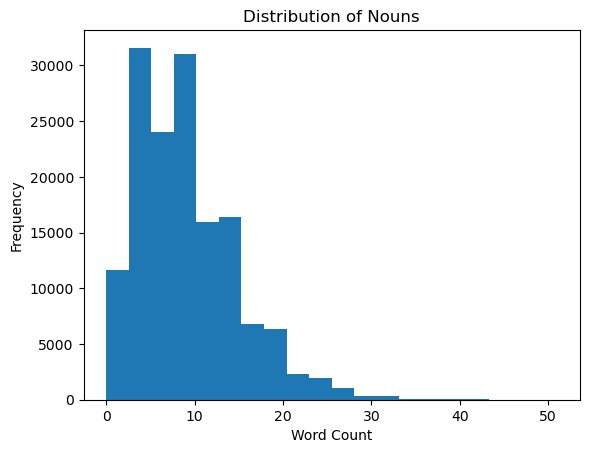

In [69]:
#Plot 10 - Distribution of AI_adjectives
plt.hist(df['AI_adjective_count'], bins=20)
plt.title('Distribution of Nouns')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()